In [4]:
import pandas as pd
import numpy as np

In [5]:
df_portfolio = pd.read_csv("sentiment_scores_LMD_portfolio.csv", sep='|', encoding='UTF-8')
df_24hu = pd.read_csv("sentiment_scores_LMD_24hu.csv", sep='|', encoding='UTF-8')
df_index = pd.read_csv("sentiment_scores_LMD_index.csv", sep='|', encoding='UTF-8')

In [6]:
df = pd.concat([df_portfolio,df_24hu,df_index], axis=0)

In [7]:
df = df[df['date'] != 'Date not found']

In [12]:
df.reset_index(inplace=True, drop=True)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df = df[(df['date'] >= "2018-02-01") & (df['date'] <= "2025-01-01")]

In [13]:
df

,translated_content,date,sentiment_score
0,The government's decision regarding guest work...,2024-12-24,-0.005076
1,A Tesla exploded in front of Trump's hotel - O...,2025-01-01,-0.105634
2,Comprehensive investments are starting in thre...,2025-01-01,-0.025210
3,"On January 1st, Russia attacked Kyiv, killing ...",2025-01-01,-0.034826
4,Russia has stopped delivering natural gas to E...,2025-01-01,-0.027675
...,...,...,...
97109,Tesco Acknowledges Layoffs. In a statement rel...,2018-02-01,-0.019231
97110,Suppliers are being sought with a tight deadli...,2018-02-01,-0.045455
97111,A bakery in Budapest was making dough with a d...,2018-02-01,-0.058824
97112,"In a few weeks, it will be easier to apply for...",2018-02-01,0.024096


In [14]:
df.to_csv("sentiment_scores_LMD_final.csv", sep="|", encoding='utf-8', index=False)

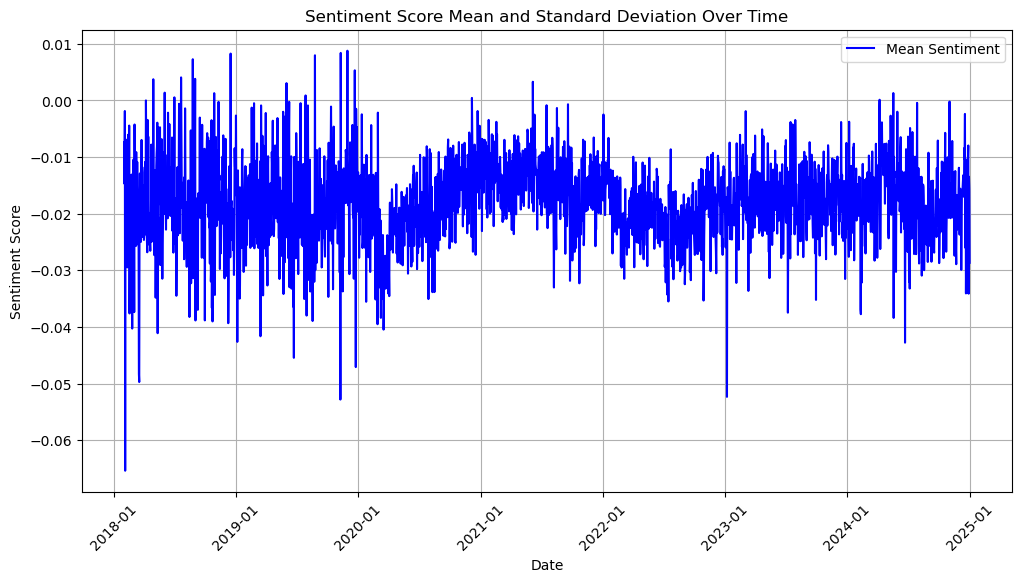

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Aggregating sentiment scores by date
df_grouped = df.groupby("date")["sentiment_score"].agg(["mean", "std"])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean sentiment score
ax.plot(df_grouped.index, df_grouped["mean"], label="Mean Sentiment", color="blue")

# Formatting the x-axis labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically choose a reasonable date interval
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Show only Year-Month format
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Additional plot formatting
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Mean and Standard Deviation Over Time")
plt.legend()
plt.grid()

# Show the plot
plt.show()


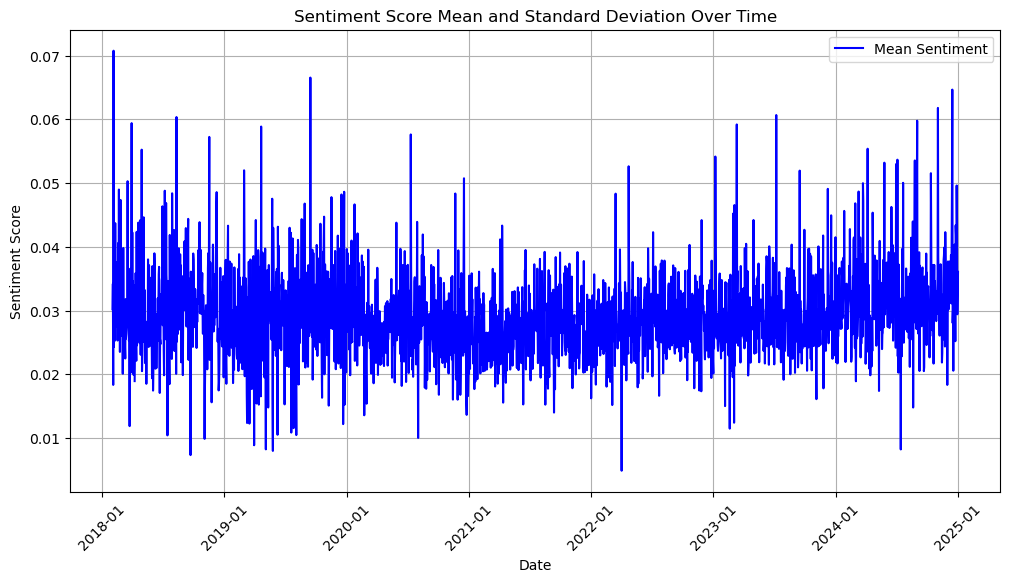

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean sentiment score
ax.plot(df_grouped.index, df_grouped["std"], label="Mean Sentiment", color="blue")

# Formatting the x-axis labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically choose a reasonable date interval
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Show only Year-Month format
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Additional plot formatting
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Mean and Standard Deviation Over Time")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [18]:
df.groupby(df['date'].dt.day_name())['sentiment_score'].agg(['count','mean', 'std'])

,count,mean,std
date,,,
Friday,15266,-0.018504,0.030408
Monday,16970,-0.018318,0.029968
Saturday,6528,-0.017881,0.030498
Sunday,6144,-0.017829,0.029323
Thursday,17274,-0.018318,0.030506
Tuesday,17589,-0.018313,0.030241
Wednesday,17343,-0.018172,0.029618


In [16]:
df_grouped.to_csv("agg_sentiment_score_finbert.csv", sep="|", encoding='utf-8')

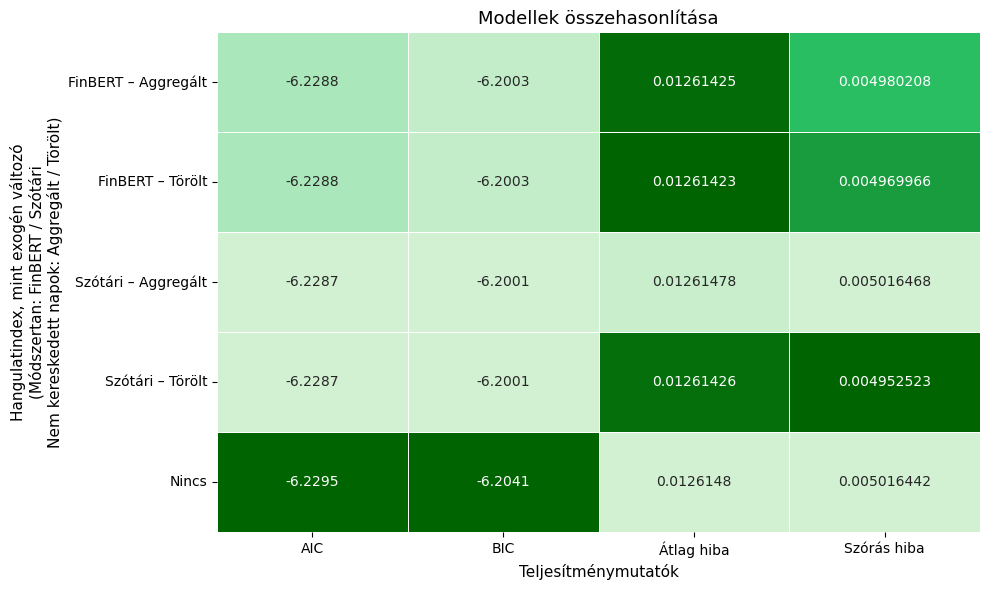

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adatok betöltése
data = {
    "Modell": [
        "FinBERT – Aggregált",
        "FinBERT – Törölt",
        "Szótári – Aggregált",
        "Szótári – Törölt",
        "Nincs"
    ],
    "AIC": [-6.2288, -6.2288, -6.2287, -6.2287, -6.2295],
    "BIC": [-6.2003, -6.2003, -6.2001, -6.2001, -6.2041],
    "Átlag hiba": [0.01261425, 0.01261423, 0.01261478, 0.01261426, 0.0126148],
    "Szórás hiba": [0.004980208, 0.004969966, 0.005016468, 0.004952523, 0.005016442]
}

df = pd.DataFrame(data)
df.set_index("Modell", inplace=True)

import numpy as np

# Normalizálás minden oszlopra külön: kisebb érték = jobb (zöld)
# Min-max skála inverz formában: (max - x) / (max - min)
normalized_df = df.copy()
for column in df.columns:
    col_min = df[column].min()
    col_max = df[column].max()
    normalized_df[column] = (col_max - df[column]) / (col_max - col_min)

from matplotlib.colors import LinearSegmentedColormap

# Egyedi zöld árnyalatú colormap (világos, de nem túl fényes)
colors = ["#d2f0d2", "#2ecc71", "#006400"]  # Az első szín világosabb, de nem túl fényes
custom_cmap = LinearSegmentedColormap.from_list("custom_green", colors)
#custom_cmap = plt.get_cmap("Greens")

# Hőtérkép újrarajzolása oszloponként külön skálázott színekkel
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    normalized_df,
    annot=df,  # Eredeti értékek jelenjenek meg
    fmt=".7g",
    cmap=custom_cmap,
    linewidths=0.5,
    cbar=False  # Ne legyen színtérkép, mert most több skálát használunk
)


# Cím és tengely címek
plt.title("Modellek összehasonlítása", fontsize=13)
plt.ylabel("Hangulatindex, mint exogén változó\n(Módszertan: FinBERT / Szótári\nNem kereskedett napok: Aggregált / Törölt)", fontsize=11)
plt.xlabel("Teljesítménymutatók", fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()

